c:\users\s1250039\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


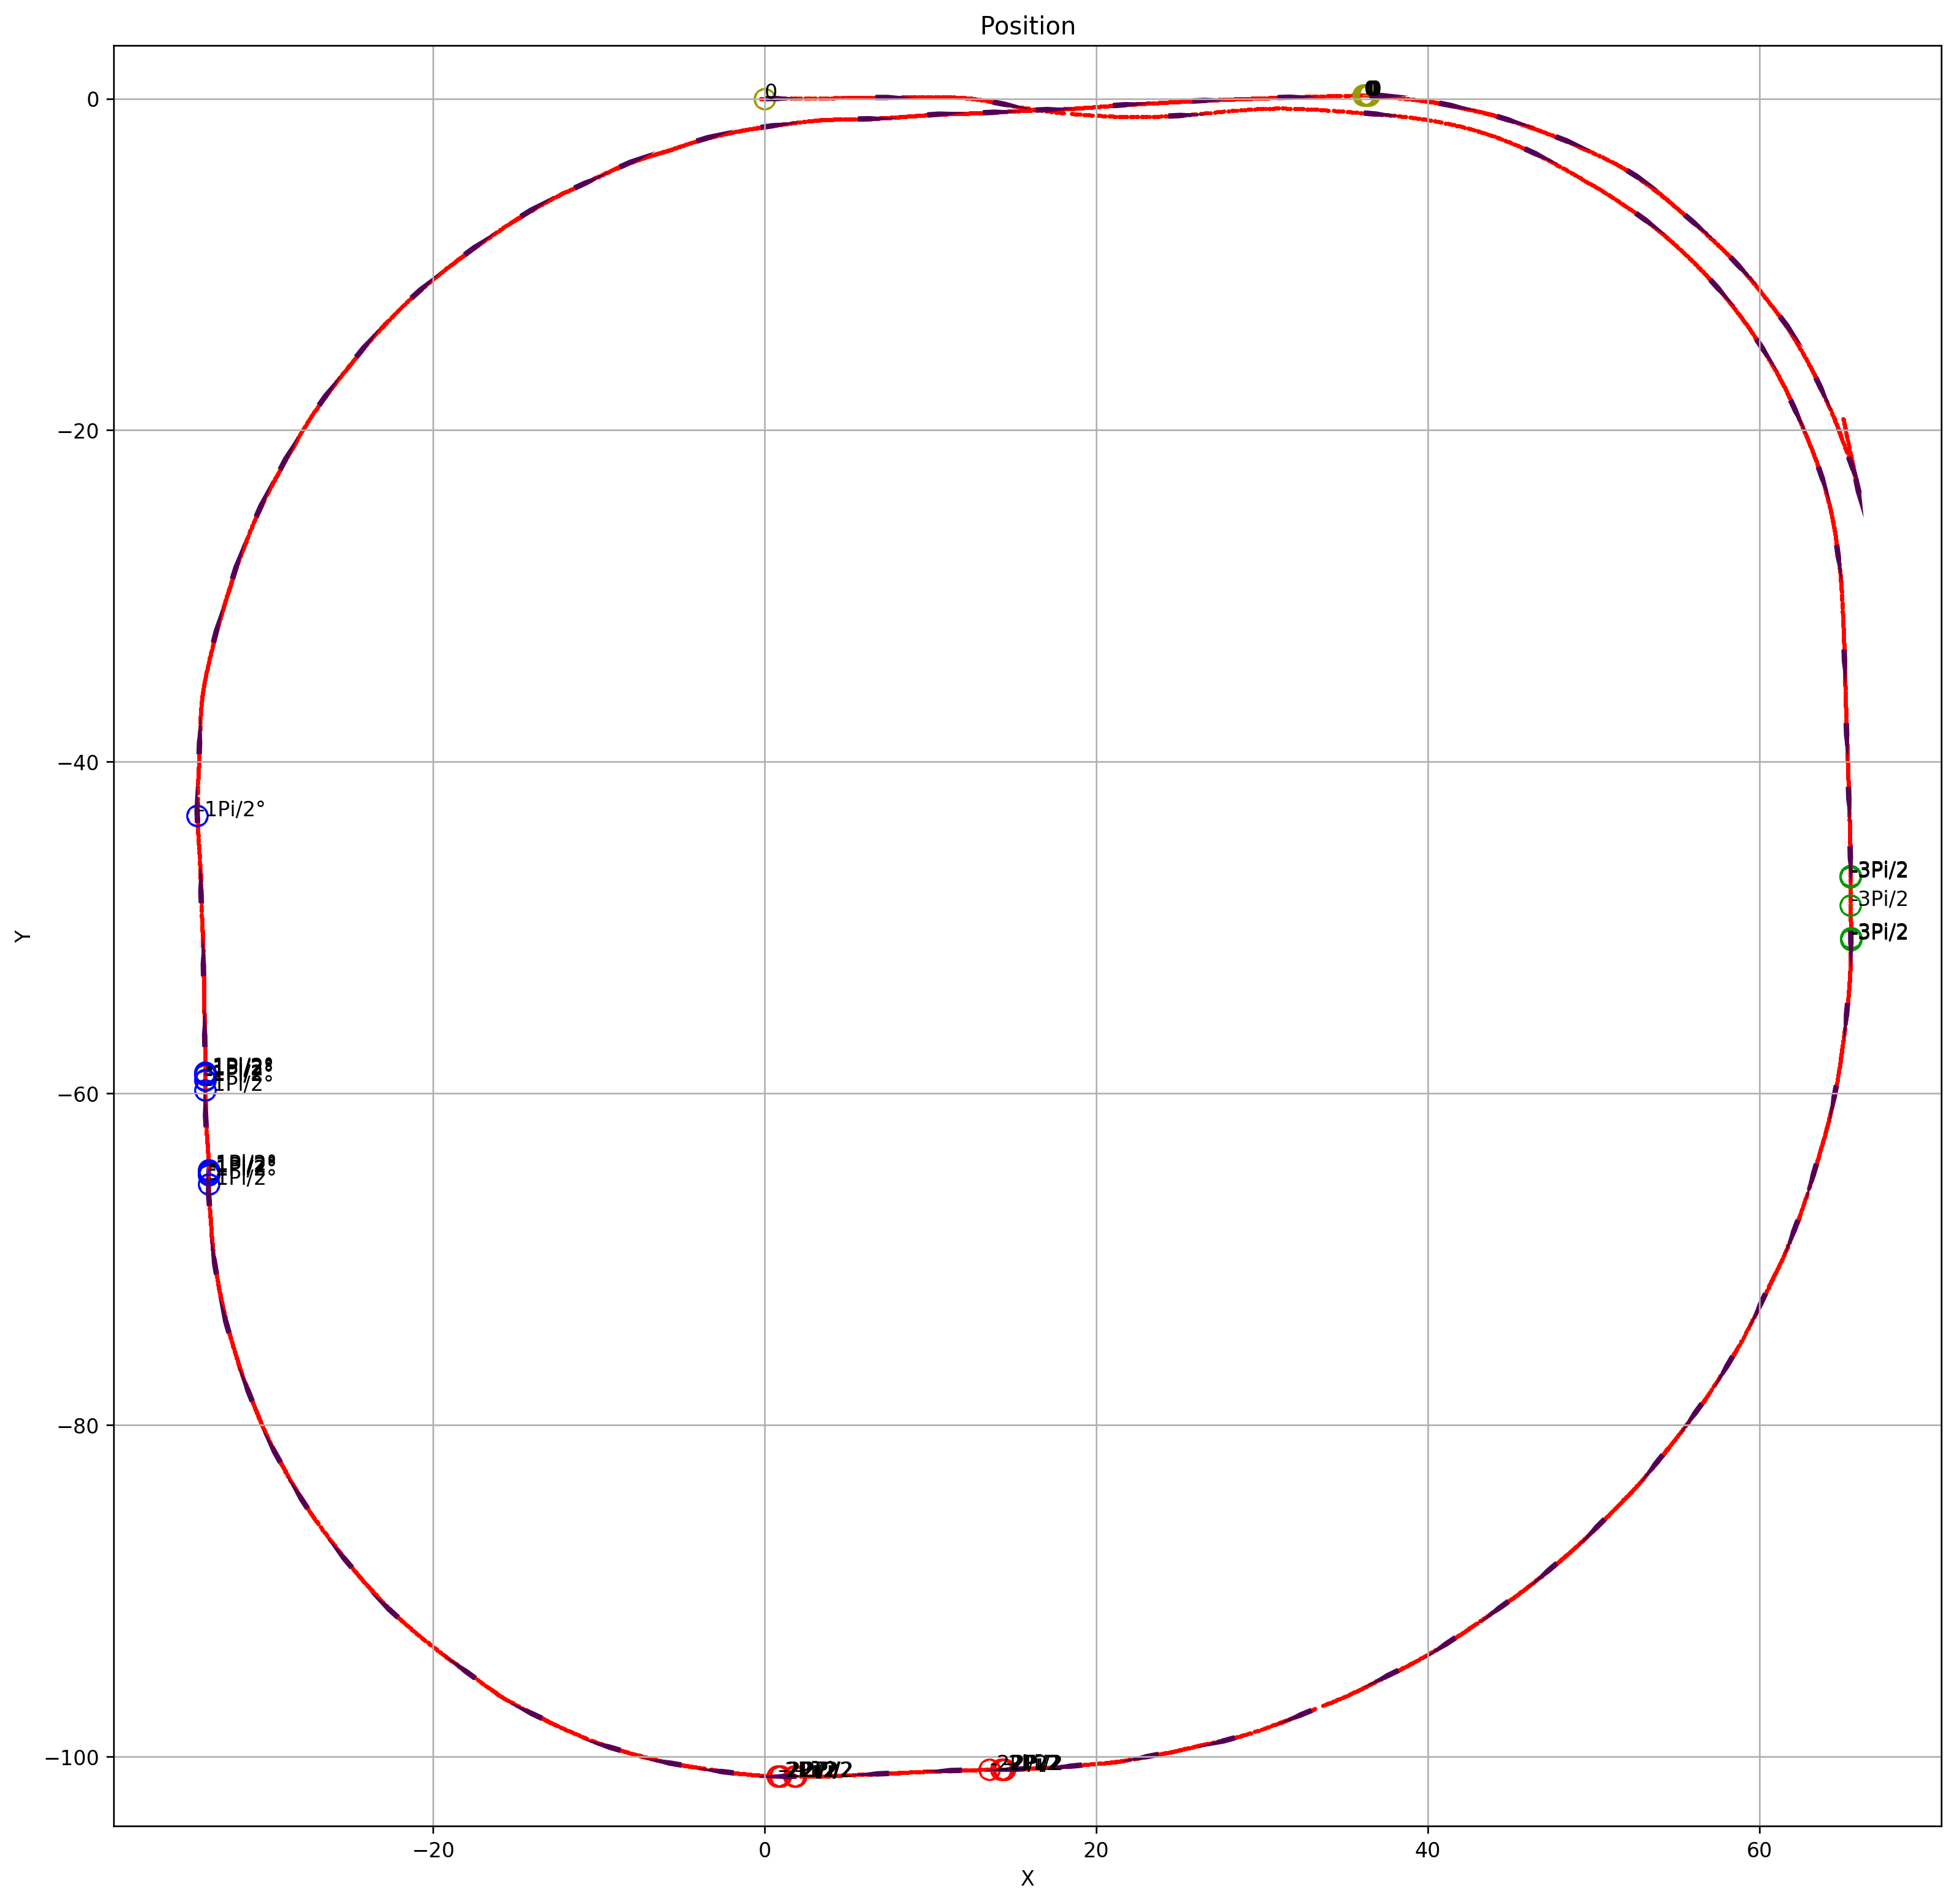

In [64]:
## SakiDocs jupyter
## tari@s1250039

## 注意点
#
# 一番最初の実行はグラフがうまく出ないかも
#
## 変数名について
#
# 変数名はCCC_NNNNNの形にしているものが多い。
# 
# CCCは接頭辞
# 
# fmt: 整形後データ
# raw: 生データ(取得したそのままの、単位を持つ値)
# plt: プロット
# tms: プロットを見やすくするためにﾁｮﾒ回おきに取得したもの
# max: 標準偏差
# max: 最大値
# min: 最小値
#
# NNNNNは個別の名前。
#
# その他の変数
#
# c: カウント用変数

#################### Import ####################

# import文で外部のライブラリをインポートする。
# > import ライブラリ名 as 渾名
# いちいちmatplotlib.pyplotと打つのは面倒なのでpltと略す。
# なむぽよ～～～

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


#################### Read CSV ####################

# CSVファイルから値を取り出してそれぞれの変数に格納する。

#------------------------------------------------------------
# ぽよめも
# 宣言について
# Pythonは動的型付けなので、変数の前に型を宣言する必要はない。
# オブジェクト志向?
# 変数の宣言
# > hensuu = value
# 配列の宣言
# > hayretz1 = []
# > hayretz2 = [yoso1, yoso2]
#------------------------------------------------------------

#0 : sensor
#1 : filtered
#2 : forward
#3 : turn
#4 : gyro
#5 : left motor angle
#6 : right motor angle
#7 : voltage
#8 : left motor pwm
#9 : right motor pwm

#----------------------------------------------------------------------
# ぽよめも
# forループについて
# > for line in file_lines
# file_linesを上からlineに格納する。
# file_linesの要素数だけル-プが回ったら終了。
# replaceについて
# 第1引数を第2引数で置換する。
# 文字列は改行込みで読み込まれるので、これを虚無で置換する。
# splitについて
# 読み込まれるデ-タはcsv形式なので、ｶﾝﾏｧが来たらそこでデータを分割する。
# float(line.replace("\n", "").split(",")[0]の[0]の基準は常に行の先頭。
# 何度読み込んでも変わらない。
#----------------------------------------------------------------------


##### Declare #####
raw_fltre = []
raw_flted = []
raw_fowrd = []
raw_turne = []
raw_gyroh = []
raw_mot_l = []
raw_mot_r = []
raw_voltg = []
raw_pwm_l = []
raw_pwm_r = []
raw_g_ofs = []
raw_theta = []
raw_pos_x = []
raw_pos_y = []
raw_speed = []

# Color List #
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf' , '#ff00ff', '#00ff00']

##### File Open #####

file = open("forward_190913_17.txt")
# readlinesでfileを1行づつ読み込んで、file_linesに格納する。
# 以下はファイル読み込み用配列
file_lines = file.readlines()

##### VaLu Into Array #####

# appendで配列の最後に要素を追加する。
for line in file_lines:
    raw_fltre.append(float(line.replace("\n", "").split(",")[0]))
    raw_flted.append(float(line.replace("\n", "").split(",")[1]))
    raw_fowrd.append(float(line.replace("\n", "").split(",")[2]))
    raw_turne.append(float(line.replace("\n", "").split(",")[3]))
    raw_gyroh.append(float(line.replace("\n", "").split(",")[4]))
    raw_mot_l.append(float(line.replace("\n", "").split(",")[5]))
    raw_mot_r.append(float(line.replace("\n", "").split(",")[6]))
    raw_voltg.append(float(line.replace("\n", "").split(",")[7])) # mV
    raw_pwm_l.append(float(line.replace("\n", "").split(",")[8])) # -100~100 int
    raw_pwm_r.append(float(line.replace("\n", "").split(",")[9])) # -100~100 int
    raw_g_ofs.append(float(line.replace("\n", "").split(",")[10]))
    raw_theta.append(float(line.replace("\n", "").split(",")[11])) # Pi
    raw_pos_x.append(float(line.replace("\n", "").split(",")[12]))
    raw_pos_y.append(float(line.replace("\n", "").split(",")[13]))
    raw_speed.append(float(line.replace("\n", "").split(",")[14]))


#################### Maxim and Min ####################

# 最大値と最小値を求める。

##### Declare and Substitute#####
max_fltre = np.max(raw_fltre)
max_flted = np.max(raw_flted)
max_fowrd = np.max(raw_fowrd)
max_turne = np.max(raw_turne)
max_gyroh = np.max(raw_gyroh)
max_mot_l = np.max(raw_mot_l)
max_mot_r = np.max(raw_mot_r)
max_g_ofs = np.max(raw_g_ofs)
max_theta = np.max(raw_theta)
max_pos_x = np.max(raw_pos_x)
max_pos_y = np.max(raw_pos_y)
max_speed = np.max(raw_speed)
min_fltre = np.min(raw_fltre)
min_flted = np.min(raw_flted)
min_fowrd = np.min(raw_fowrd)
min_turne = np.min(raw_turne)
min_gyroh = np.min(raw_gyroh)
min_mot_l = np.min(raw_mot_l)
min_mot_r = np.min(raw_mot_r)
min_g_ofs = np.min(raw_g_ofs)
min_theta = np.min(raw_theta)
min_pos_x = np.min(raw_pos_x)
min_pos_y = np.min(raw_pos_y)
min_speed = np.min(raw_speed)

#################### Standard Deviation ####################

# 標準偏差を求める。

##### Declare and Substitute#####
std_fltre = np.std(raw_fltre)
std_flted = np.std(raw_flted)
std_fowrd = np.std(raw_fowrd)
std_turne = np.std(raw_turne)
std_gyroh = np.std(raw_gyroh)
std_mot_l = np.std(raw_mot_l)
std_mot_r = np.std(raw_mot_r)
std_g_ofs = np.std(raw_g_ofs)
std_theta = np.std(raw_theta)
std_pos_x = np.std(raw_pos_x)
std_pos_y = np.std(raw_pos_y)
std_speed = np.std(raw_speed)


#################### 1/n ####################

# 取得した値の配列をn個飛ばしにする。

##### Declare #####
tms_pos_x = []
tms_pos_y = []
tms_theta = []
tms_speed = []
n = 100 #ここを変える

##### Process #####
for c in range(0, len(raw_pos_x),n): #YYYは結局使わなかった
    tms_pos_x.append(raw_pos_x[c])
    tms_pos_y.append(raw_pos_y[c]) 
    tms_theta.append(raw_theta[c])
    tms_speed.append(raw_speed[c])



#################### plot ####################

# プロット

##### Declare #####
max_atayi = np.max(raw_speed)
min_atayi = np.min(raw_speed)
fmt_atayi = []
raw_atayi = tms_speed
raw_shcnt = [] #周回数、中身は整数値
fmt_theta = [] # ここに格納されるのは、範囲を0から2πにしたｽｨｰﾀｧ
π = np.pi
x1 = []
y1 = []
x2 = []
y2 = []

##### Graph Settings #####
# グラフの設定(グラフの大きさとか)

plt_figre = plt.figure(figsize=(16,16), dpi=240) # figsize=(x, y)の単位はinch
plt_axes1= plt_figre.add_subplot(1,1,1)
x1 = tms_pos_x
y1 = tms_pos_y
x2 = np.cos(tms_theta)
y2 = np.sin(tms_theta)
# グリッド線の設定
plt.grid()
#ax.set_xlim(-150, 150)
#ax.set_ylim(-100, 100)
#ax.set_xticks(np.linspace(-150, 150, 31))
#ax.set_yticks(np.linspace(-100, 100, 21))
# アスペクト比の調整
plt.axes().set_aspect('equal', 'datalim')
# グラフのタイトル
plt_axes1.set_title('Position')
# X軸のタイトル
plt_axes1.set_xlabel('X')
# Y軸のタイトル
plt_axes1.set_ylabel('Y')

##### Preprocess #####
# 前処理

for c in range(len(tms_speed)):
    fmt_atayi.append(1-((raw_atayi[c] - max_speed) / (max_speed - min_speed)))

##### Process #####
# 処理

plt_axes1.scatter(raw_pos_x,raw_pos_y, c='#FFFF00', s=1, marker='o')
plt_axes1.scatter(raw_pos_x,raw_pos_y, c='red', s=1, marker='o')
for c in range(len(raw_theta)):
    raw_shcnt.append(int(raw_theta[c] / (2 * π))) # theta_shに周回数を記録する。(単位は回、周回数) 
    fmt_theta.append(raw_theta[c] - 2 * π * raw_shcnt[c])
for c in range(len(raw_speed)): # if文上段はｽｨｰﾀｧが正、下段はｽｨｰﾀｧが負のとき
    if c == 0 or raw_shcnt[c] != raw_shcnt[c-1]: # Start或いは一周したときは黄色
        plt_axes1.scatter(raw_pos_x[c], raw_pos_y[c], c='#999900', s=1, marker='o', lw=10)
        plt.text(raw_pos_x[c],raw_pos_y[c], r'0')
    elif fmt_theta[c] > π/2 and fmt_theta[c-1] < π/2 or fmt_theta[c] < π/2 and fmt_theta[c-1] > π/2: # 90度は青
        plt_axes1.scatter(raw_pos_x[c],raw_pos_[c], c='#0000FF', s=1, marker='o', lw=10)
        plt.text(raw_pos_x[c],raw_pos_y[c], r'1Pi/2°')
    elif fmt_theta[c] > π and fmt_theta[c-1] < π or fmt_theta[c]<π and fmt_theta[c-1] > π: # 180度は緑
        plt_axes1.scatter(raw_pos_x[c],raw_pos_y[c], c='#FF0000', s=1, marker='o', lw=10)
        plt.text(raw_pos_x[c],raw_pos_y[c], r'2Pi/2')
    elif fmt_theta[c] > 3*π/2 and fmt_theta[c-1] < 3*π/2 or fmt_theta[c] < 3*π/2 and fmt_theta[c-1] > 3*π/2: # 270度は緑
        plt_axes1.scatter(raw_pos_x[c],raw_pos_y[c], c='#009900', s=1, marker='o', lw=10)
        plt.text(raw_pos_x[c],raw_pos_y[c], r'3Pi/2')
    elif fmt_theta[c] > -3*π/2 and fmt_theta[c-1] < -3*π/2 or fmt_theta[c] < -3*π/2 and fmt_theta[c-1] > -3*π/2: # -90度は青
        plt_axes1.scatter(raw_pos_x[c],raw_pos_y[c], c='#0000FF', s=1, marker='o', lw=10)
        plt.text(raw_pos_x[c],raw_pos_y[c], r'-1Pi/2°')
    elif fmt_theta[c] > -1*π and fmt_theta[c-1] < -1*π or fmt_theta[c] < -1*π and fmt_theta[c-1] > -1*π: # -180度は赤
        plt_axes1.scatter(raw_pos_x[c],raw_pos_y[c], c='#FF0000', s=1, marker='o', lw=10)
        plt.text(raw_pos_x[c],raw_pos_y[c], r'-2Pi/2')
    elif fmt_theta[c] > -1*π/2 and fmt_theta[c-1] < -1*π/2 or fmt_theta[c] < -1*π/2 and fmt_theta[c-1] > -1*π/2: # -270度は緑
        plt_axes1.scatter(raw_pos_x[c],raw_pos_y[c], c='#009900', s=1, marker='o', lw=10)
        plt.text(raw_pos_x[c],raw_pos_y[c], r'-3Pi/2')
        c=0
for c in range(len(x1)):
    plt_axes1.quiver(x1[c],y1[c],x2[c],y2[c],color='#550055',scale=fmt_atayi[0]*30,headwidth=1,width=0.003)#scaleは10くらいが気持ちいい
plt.savefig('HKato.png')